In [1]:
#importing libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#KNN Algorthim for dataset with 2 features

class KNN:
    
    def __init__(self,X):
        
        self.X=X
    
    def eucledian(self,x1,y1):
        #First get the point that you want to label i.e. every single point
        d=[]
        for i in range(self.X.shape[0]):
            d.append(math.sqrt(((self.X[i][0] - x1)**2) + (self.X[i][1] - y1)**2))
        return d
    
    def cluster(self,k,X):
        
        sorted_indices = np.argsort(X[:, 3])

        # Use the sorted indices to sort the array
        sorted_array = X[sorted_indices]
        selected_array=[]
        for i in range(k):
            selected_row = sorted_array[i]
            selected_array.append(selected_row)
        class_counts = {}

        # Iterate over the selected array and count the occurrences of each class
        for row in selected_array:
            class_label = row[-2] 
            if class_label in class_counts:
                class_counts[class_label] += 1
            else:
                class_counts[class_label] = 1
        max_count_class = max(class_counts, key=class_counts.get)
        return max_count_class
    
    def accuracy(self,X):
        
        correct=0
        for i in range(X.shape[0]):
            if X[i][2]==X[i][3]:
                correct= correct + 1
        
        a=correct/self.X.shape[0]
        
        return a
    
    
        

In [ ]:
#what are the best features to select to determine a mobile's price range?

In [3]:
df=pd.read_csv('train.csv')
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df=df[['battery_power','talk_time','price_range']]
df.head()

,battery_power,talk_time,price_range
0,842,19,1
1,1021,7,2
2,563,9,2
3,615,11,2
4,1821,15,1


In [5]:
from sklearn.preprocessing import MinMaxScaler
X=np.array(df[['battery_power','talk_time']])
y=np.array(df[['price_range']])
y=y.ravel()
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [6]:
combined_array = np.concatenate((X_normalized,y[:,np.newaxis] ), axis=1)
combined_array

array([[0.22778891, 0.94444444, 1.        ],
       [0.34736139, 0.27777778, 2.        ],
       [0.04141617, 0.38888889, 2.        ],
       ...,
       [0.94188377, 0.16666667, 3.        ],
       [0.6753507 , 0.94444444, 0.        ],
       [0.00601202, 0.        , 3.        ]])

In [7]:
#Applying the KNN algorithm
k=KNN(combined_array)
c=[]
for i in range(combined_array.shape[0]):
    x1=combined_array[i][0]
    y1=combined_array[i][1]
    d=k.eucledian(x1,y1)
    d=np.array(d)
    com_array=np.c_[combined_array,d]
    c.append(k.cluster(5,com_array))


In [8]:
final_array=np.c_[combined_array,c]


In [9]:
final_array

array([[0.22778891, 0.94444444, 1.        , 1.        ],
       [0.34736139, 0.27777778, 2.        , 2.        ],
       [0.04141617, 0.38888889, 2.        , 2.        ],
       ...,
       [0.94188377, 0.16666667, 3.        , 3.        ],
       [0.6753507 , 0.94444444, 0.        , 0.        ],
       [0.00601202, 0.        , 3.        , 0.        ]])

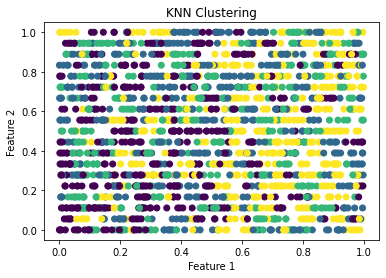

In [10]:
#Visualization of the clusters after training
# Create a scatter plot of the clustered data
plt.scatter(final_array[:, 0], final_array[:, 1], c=final_array[:,3], cmap='viridis')
plt.title('KNN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
#Accuracy of the cluster analysis
accuracy=k.accuracy(final_array)
accuracy

0.6385